In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
df = pd.read_csv('../data/EuropeanSanctions.csv')

<AxesSubplot: >

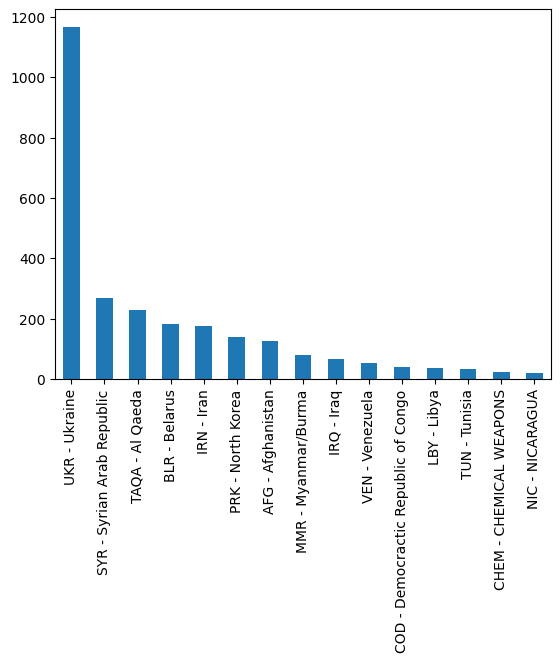

In [3]:
df.Programme.value_counts()[:15].plot.bar()

In [5]:
conll_train_df = pd.read_csv('../data/conll2003/conll2003train.csv')
conll_train_df.head()

,id,tokens,pos_tags,chunk_tags,ner_tags
0,0,['EU' 'rejects' 'German' 'call' 'to' 'boycott'...,[22 42 16 21 35 37 16 21 7],[11 21 11 12 21 22 11 12 0],[3 0 7 0 0 0 7 0 0]
1,1,['Peter' 'Blackburn'],[22 22],[11 12],[1 2]
2,2,['BRUSSELS' '1996-08-22'],[22 11],[11 12],[5 0]
3,3,['The' 'European' 'Commission' 'said' 'on' 'Th...,[12 22 22 38 15 22 28 38 15 16 21 35 24 35 37 ...,[11 12 12 21 13 11 11 21 13 11 12 13 11 21 22 ...,[0 3 4 0 0 0 0 0 0 7 0 0 0 0 0 7 0 0 0 0 0 0 0...
4,4,"['Germany' ""'s"" 'representative' 'to' 'the' 'E...",[22 27 21 35 12 22 22 27 16 21 22 22 38 15 22 ...,[11 11 12 13 11 12 12 11 12 12 12 12 21 13 11 ...,[5 0 0 0 0 3 4 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0...


In [7]:
conll_train_df['clean_tokens'] = conll_train_df.tokens.str.replace('[', '').str.replace(']', '').str.replace("'","").str.split()
conll_train_df['clean_ner_tags'] = conll_train_df.ner_tags.str.replace('[', '').str.replace(']', '').str.replace("'","").str.split()

C:\Users\Joshua\AppData\Local\Temp\ipykernel_16964\4001990754.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  conll_train_df['clean_tokens'] = conll_train_df.tokens.str.replace('[', '').str.replace(']', '').str.replace("'","").str.split()
C:\Users\Joshua\AppData\Local\Temp\ipykernel_16964\4001990754.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  conll_train_df['clean_ner_tags'] = conll_train_df.ner_tags.str.replace('[', '').str.replace(']', '').str.replace("'","").str.split()


In [ ]:
def extract_names_from_df(df, tokencolumn, ner_column):
    names = []
    for row in range(len(df.tokencolumn)):
        
    